In [47]:
import numpy as np
import matplotlib.pyplot as plt


def icp(source, target, max_iterations=20, tolerance=0.001):
    """
    Iterative Closest Point algorithm for point cloud alignment.

    Args:
        source: A NumPy array of shape (N, d) representing the source point cloud.
        target: A NumPy array of shape (M, d) representing the target point cloud.
        max_iterations: Maximum number of iterations (default: 20).
        tolerance: Convergence tolerance (default: 0.001).

    Returns:
        A tuple containing the transformed source point cloud and the transformation matrix.
    """

    # Check for valid input
    if not isinstance(source, np.ndarray) or not isinstance(target, np.ndarray):
        raise ValueError("Input clouds must be NumPy arrays")
    if source.ndim != 2 or target.ndim != 2:
        raise ValueError("Input clouds must have dimension 2 (N x d or M x d)")

    # Initialize variables
    transform = np.eye(source.shape[1] + 1)  # Initialize transformation matrix as identity
    for _ in range(max_iterations):
        # Find closest points in target for each point in source
        distances, indices = closest_point_search(source, target)

        # Calculate centroid of source and target correspondences
        source_centroid = np.mean(source, axis=0)
        target_centroid = np.mean(target[indices], axis=0)

        # Compute covariance matrix
        covariance = np.cov(
            np.vstack((source - source_centroid, target[indices] - target_centroid)),
            rowvar=False,
        )

        # Perform SVD on covariance matrix
        U, S, Vt = np.linalg.svd(covariance)

        # Rotation matrix (assuming right-handed coordinate system)
        R = np.matmul(U, Vt.T)

        # Translation vector
        t = target_centroid - np.dot(R, source_centroid)

        # Update transformation matrix
        transform[: source.shape[1], : source.shape[1]] = R
        transform[: source.shape[1], -1] = t

        # Apply transformation to source points
        source = np.dot(
            transform, np.hstack((source, np.ones((source.shape[0], 1))))
        )[:, : source.shape[1]]

        # Check for convergence
        if np.mean(distances) < tolerance:
            break

    return source, transform


def closest_point_search(source, target):
    """
    Finds the closest points in target for each point in source.

    Args:
        source: A NumPy array of shape (N, d) representing the source point cloud.
        target: A NumPy array of shape (M, d) representing the target point cloud.

    Returns:
        A tuple containing a NumPy array of distances and a NumPy array of indices.
    """

    # Efficient closest point search using squared distances
    distances = np.linalg.norm(np.expand_dims(source, axis=1) - target, axis=2) ** 2
    indices = np.argmin(distances, axis=1)
    return distances.flatten(), indices.flatten()


def visualize_alignment(source, target, transformed_source):
    """
    Visualizes the alignment of two point clouds using matplotlib.

    Args:
        source: A NumPy array of shape (N, 2) representing the source point cloud.
        target: A NumPy array of shape (M, 2) representing the target point cloud.
        transformed_source: A NumPy array of shape (N, 2) representing the transformed source point cloud.
    """

    plt.scatter(source[:, 0], source[:, 1], label="Source")
    plt.scatter(target[:, 0], target[:, 1], label="Target")
    plt.scatter(transformed_source[:, 0], transformed_source[:, 1], label="Transformed Source")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title("ICP Alignment")
    plt.legend()
    plt.show()

source = np.array([[1, 2], [3, 4], [5, 6]], dtype=np.float32)
target = np.array([[1.5, 2], [3.5, 4], [5.5, 6]], dtype=np.float32)



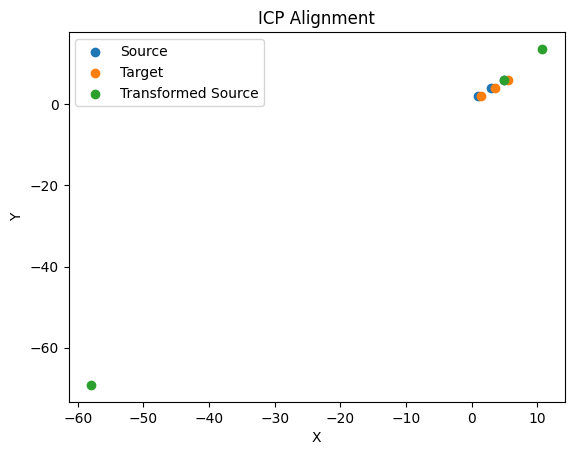

In [48]:
visualize_alignment(source, target, icp(source, target)[0]   )

In [49]:
icp(source, target) 

(array([[ 10.73457378,  13.68148854],
        [-57.98517511, -69.18221013],
        [  5.        ,   6.        ]]),
 array([[ 1.        ,  0.        , -6.38549179],
        [ 0.        ,  1.        , -8.39592345],
        [ 0.        ,  0.        ,  1.        ]]))

In [50]:
closest_point_search(source, target)

(array([ 0.25    , 10.25    , 36.25    ,  6.25    ,  0.25    , 10.25    ,
        28.250002,  6.25    ,  0.25    ], dtype=float32),
 array([0, 1, 2]))

In [51]:
def visualize_alignments(clouds, labels):
    """
    Visualizes the alignment of two point clouds using matplotlib.

    Args:
        clouds: A list of  NumPy arrays of shape (N, 2) representing the source point clouds.
        labels: A list of strings representing the titles.
    """
    for i, cloud in enumerate(clouds):
        plt.scatter(cloud[:, 0], cloud[:, 1], label=labels[i])
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title("ICP Alignment")
    plt.legend()
    plt.show()


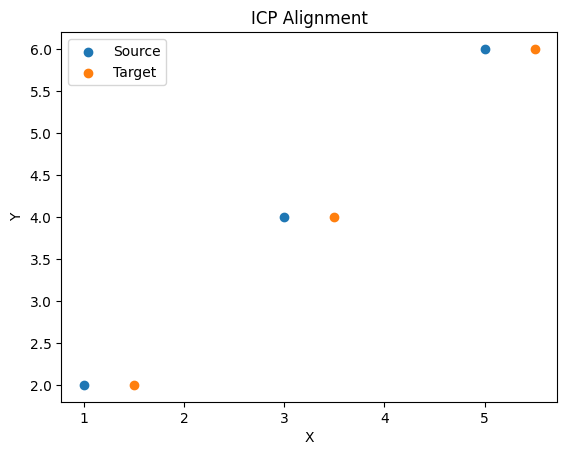

In [52]:
visualize_alignments([source, target], ["Source", "Target"])

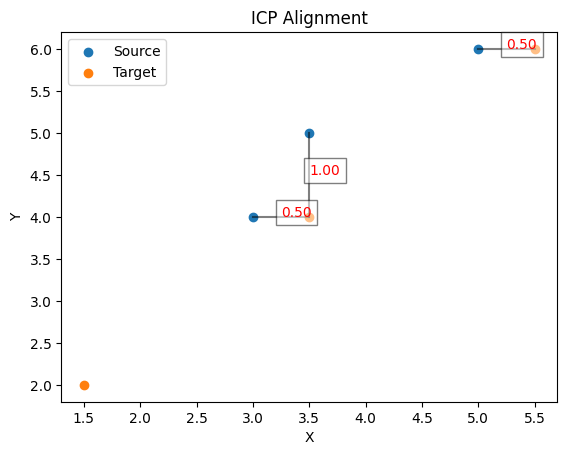

In [53]:

def visualize_closest(source, target):
    """
    Visualizes the alignment of two point clouds using matplotlib.

    Args:
        source: A NumPy array of shape (N, 2) representing the source point cloud.
        target: A NumPy array of shape (M, 2) representing the target point cloud.
    """

    plt.scatter(source[:, 0], source[:, 1], label="Source")
    plt.scatter(target[:, 0], target[:, 1], label="Target")
    distances, indices = closest_point_search(source, target)
    for i, index in enumerate(indices):
        plt.plot(
            [source[i, 0], target[index, 0]],
            [source[i, 1], target[index, 1]],
            color="black",
            alpha=0.5,
        )
        # label in middle of each line with distance
        
        plt.text(
            (source[i, 0] + target[index, 0]) / 2,
            (source[i, 1] + target[index, 1]) / 2,
            f"{np.sqrt(distances[3*i+ index]):.2f}",
            color="red",
            bbox = dict(facecolor='white', alpha=0.5)
        )
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title("ICP Alignment")
    plt.legend()
    plt.show()
visualize_closest(icp(source, target, max_iterations=1, tolerance=0.001)[0], target)

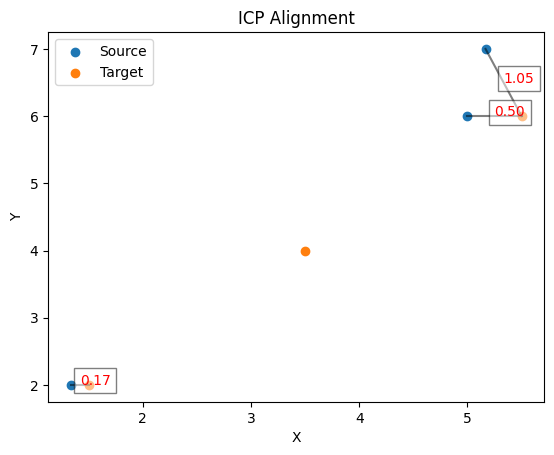

In [54]:
visualize_closest(icp(source, target, max_iterations=2, tolerance=0.001)[0], target)

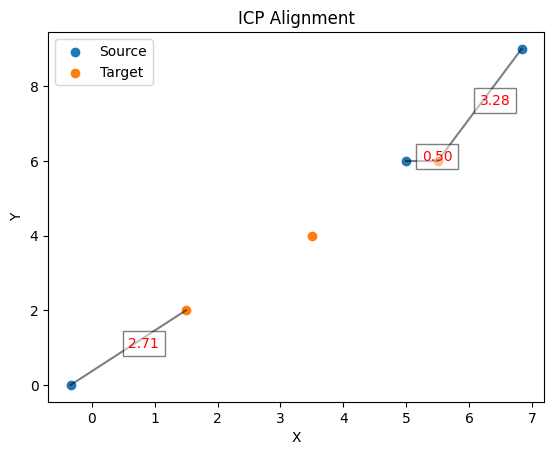

In [55]:
visualize_closest(icp(source, target, max_iterations=3, tolerance=0.001)[0], target)

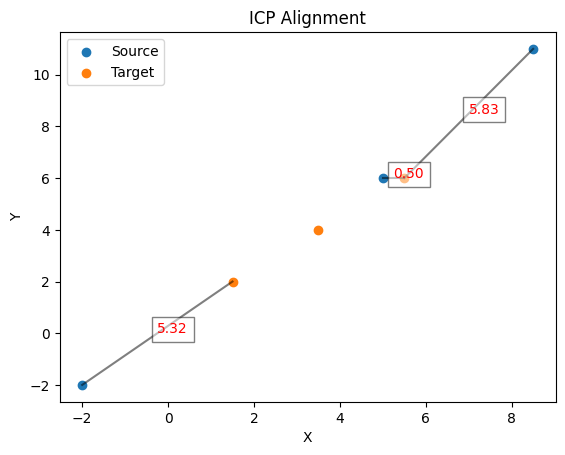

In [56]:
visualize_closest(icp(source, target, max_iterations=4, tolerance=0.001)[0], target)

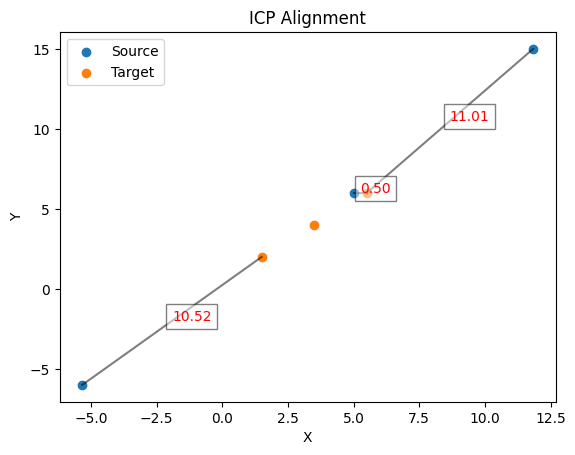

In [58]:
visualize_closest(icp(source, target, max_iterations=6, tolerance=0.001)[0], target)

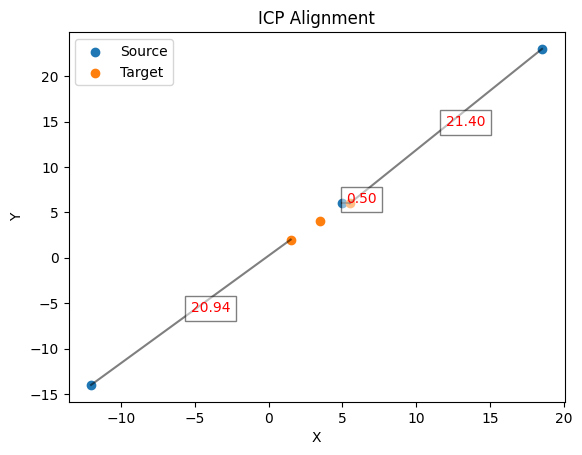

In [59]:
visualize_closest(icp(source, target, max_iterations=10, tolerance=0.001)[0], target)

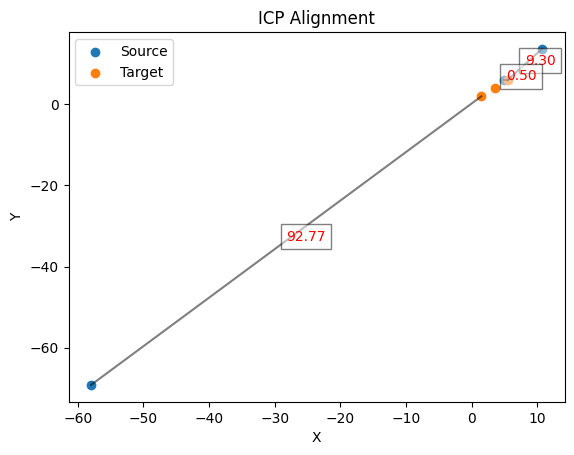

In [60]:
visualize_closest(icp(source, target, max_iterations=20, tolerance=0.001)[0], target)

In [61]:
%pip install simpleicp


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.9/105.9 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.4/98.4 kB 2.2 MB/s eta 0:00:00eta 0:00:01


In [62]:
from simpleicp import PointCloud, SimpleICP
import numpy as np

# Read point clouds from xyz files into n-by-3 numpy arrays
X_fix = source
X_mov = target

# Create point cloud objects
pc_fix = PointCloud(X_fix, columns=["x", "y"])
pc_mov = PointCloud(X_mov, columns=["x", "y"])

# Create simpleICP object, add point clouds, and run algorithm!
icp = SimpleICP()
icp.add_point_clouds(pc_fix, pc_mov)
H, X_mov_transformed, rigid_body_transformation_params, distance_residuals = icp.run(max_overlap_distance=1)

PointCloudException: Column "z" is missing in DataFrame.

In [3]:
import math
import numpy as np
from sklearn.neighbors import NearestNeighbors


def euclidean_distance(point1, point2):
    """
    Euclidean distance between two points.
    :param point1: the first point as a tuple (a_1, a_2, ..., a_n)
    :param point2: the second point as a tuple (b_1, b_2, ..., b_n)
    :return: the Euclidean distance
    """
    a = np.array(point1)
    b = np.array(point2)

    return np.linalg.norm(a - b, ord=2)


def point_based_matching(point_pairs):
    """
    This function is based on the paper "Robot Pose Estimation in Unknown Environments by Matching 2D Range Scans"
    by F. Lu and E. Milios.

    :param point_pairs: the matched point pairs [((x1, y1), (x1', y1')), ..., ((xi, yi), (xi', yi')), ...]
    :return: the rotation angle and the 2D translation (x, y) to be applied for matching the given pairs of points
    """

    x_mean = 0
    y_mean = 0
    xp_mean = 0
    yp_mean = 0
    n = len(point_pairs)

    if n == 0:
        return None, None, None

    for pair in point_pairs:

        (x, y), (xp, yp) = pair

        x_mean += x
        y_mean += y
        xp_mean += xp
        yp_mean += yp

    x_mean /= n
    y_mean /= n
    xp_mean /= n
    yp_mean /= n

    s_x_xp = 0
    s_y_yp = 0
    s_x_yp = 0
    s_y_xp = 0
    for pair in point_pairs:

        (x, y), (xp, yp) = pair

        s_x_xp += (x - x_mean)*(xp - xp_mean)
        s_y_yp += (y - y_mean)*(yp - yp_mean)
        s_x_yp += (x - x_mean)*(yp - yp_mean)
        s_y_xp += (y - y_mean)*(xp - xp_mean)

    rot_angle = math.atan2(s_x_yp - s_y_xp, s_x_xp + s_y_yp)
    translation_x = xp_mean - (x_mean*math.cos(rot_angle) - y_mean*math.sin(rot_angle))
    translation_y = yp_mean - (x_mean*math.sin(rot_angle) + y_mean*math.cos(rot_angle))

    return rot_angle, translation_x, translation_y


def icp(reference_points, points, max_iterations=100, distance_threshold=0.3, convergence_translation_threshold=1e-3,
        convergence_rotation_threshold=1e-4, point_pairs_threshold=10, verbose=False):
    """
    An implementation of the Iterative Closest Point algorithm that matches a set of M 2D points to another set
    of N 2D (reference) points.

    :param reference_points: the reference point set as a numpy array (N x 2)
    :param points: the point that should be aligned to the reference_points set as a numpy array (M x 2)
    :param max_iterations: the maximum number of iteration to be executed
    :param distance_threshold: the distance threshold between two points in order to be considered as a pair
    :param convergence_translation_threshold: the threshold for the translation parameters (x and y) for the
                                              transformation to be considered converged
    :param convergence_rotation_threshold: the threshold for the rotation angle (in rad) for the transformation
                                               to be considered converged
    :param point_pairs_threshold: the minimum number of point pairs the should exist
    :param verbose: whether to print informative messages about the process (default: False)
    :return: the transformation history as a list of numpy arrays containing the rotation (R) and translation (T)
             transformation in each iteration in the format [R | T] and the aligned points as a numpy array M x 2
    """

    transformation_history = []

    nbrs = NearestNeighbors(n_neighbors=1, algorithm='kd_tree').fit(reference_points)

    for iter_num in range(max_iterations):
        if verbose:
            print('------ iteration', iter_num, '------')

        closest_point_pairs = []  # list of point correspondences for closest point rule

        distances, indices = nbrs.kneighbors(points)
        for nn_index in range(len(distances)):
            if distances[nn_index][0] < distance_threshold:
                closest_point_pairs.append((points[nn_index], reference_points[indices[nn_index][0]]))

        # if only few point pairs, stop process
        if verbose:
            print('number of pairs found:', len(closest_point_pairs))
        if len(closest_point_pairs) < point_pairs_threshold:
            if verbose:
                print('No better solution can be found (very few point pairs)!')
            break

        # compute translation and rotation using point correspondences
        closest_rot_angle, closest_translation_x, closest_translation_y = point_based_matching(closest_point_pairs)
        if closest_rot_angle is not None:
            if verbose:
                print('Rotation:', math.degrees(closest_rot_angle), 'degrees')
                print('Translation:', closest_translation_x, closest_translation_y)
        if closest_rot_angle is None or closest_translation_x is None or closest_translation_y is None:
            if verbose:
                print('No better solution can be found!')
            break

        # transform 'points' (using the calculated rotation and translation)
        c, s = math.cos(closest_rot_angle), math.sin(closest_rot_angle)
        rot = np.array([[c, -s],
                        [s, c]])
        aligned_points = np.dot(points, rot.T)
        aligned_points[:, 0] += closest_translation_x
        aligned_points[:, 1] += closest_translation_y

        # update 'points' for the next iteration
        points = aligned_points

        # update transformation history
        transformation_history.append(np.hstack((rot, np.array([[closest_translation_x], [closest_translation_y]]))))

        # check convergence
        if (abs(closest_rot_angle) < convergence_rotation_threshold) \
                and (abs(closest_translation_x) < convergence_translation_threshold) \
                and (abs(closest_translation_y) < convergence_translation_threshold):
            if verbose:
                print('Converged!')
            break

    return transformation_history, points

In [2]:
%conda install scikit-learn

Channels:
 - conda-forge
 - defaults
 - bioconda
 - nvidia
 - pytorch
Platform: linux-64
Solving environment: done

## Package Plan ##

  environment location: /rds/general/user/ao921/home/anaconda3/envs/tv

  added / updated specs:
    - scikit-learn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    joblib-1.4.2               |     pyhd8ed1ab_0         215 KB  conda-forge
    scikit-learn-1.4.2         |  py311hc009520_0         9.9 MB  conda-forge
    threadpoolctl-3.5.0        |     pyhc1e730c_0          23 KB  conda-forge
    transformers-4.40.2        |     pyhd8ed1ab_0         3.1 MB  conda-forge
    ------------------------------------------------------------
                                           Total:        13.2 MB

The following NEW packages will be INSTALLED:

  joblib             conda-forge/noarch::joblib-1.4.2-pyhd8ed1ab_0 
  scikit-learn       conda-forge/linux-64::s

------ iteration 0 ------
number of pairs found: 42
Rotation: -0.16646214907801762 degrees
Translation: -0.0645460404714151 -0.02562340865518653
------ iteration 1 ------
number of pairs found: 44
Rotation: 0.7822048451938437 degrees
Translation: -0.01681927363199831 -0.035809433452222095
------ iteration 2 ------
number of pairs found: 46
Rotation: 2.152278844984826 degrees
Translation: 0.0024678235624706613 -0.051548301909641325
------ iteration 3 ------
number of pairs found: 46
Rotation: 3.409501935546348 degrees
Translation: 0.002564865621454193 -0.06560716173542136
------ iteration 4 ------
number of pairs found: 46
Rotation: 4.1095137725699855 degrees
Translation: 0.016792033063715572 -0.06816766679067332
------ iteration 5 ------
number of pairs found: 46
Rotation: 1.158215642099272 degrees
Translation: -0.019628865838702603 -0.025644646856065045
------ iteration 6 ------
number of pairs found: 46
Rotation: 1.315849277838582 degrees
Translation: -0.013970077823995175 -0.0223015

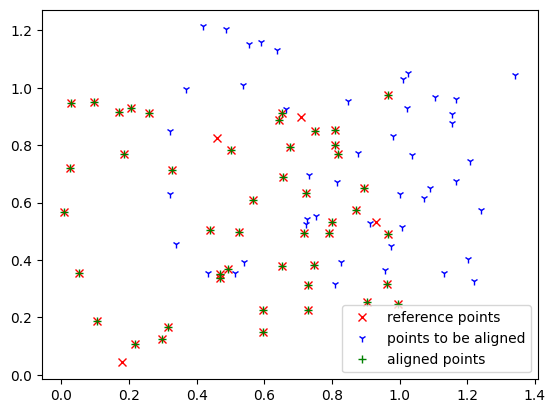

In [5]:
np.random.seed(12345)
import matplotlib.pyplot as plt

# create a set of points to be the reference for ICP
xs = np.random.random_sample((50, 1))
ys = np.random.random_sample((50, 1))
reference_points = np.hstack((xs, ys))

# transform the set of reference points to create a new set of
# points for testing the ICP implementation

# 1. remove some points
points_to_be_aligned = reference_points[1:47]

# 2. apply rotation to the new point set
theta = math.radians(12)
c, s = math.cos(theta), math.sin(theta)
rot = np.array([[c, -s],
                [s, c]])
points_to_be_aligned = np.dot(points_to_be_aligned, rot)

# 3. apply translation to the new point set
points_to_be_aligned += np.array([np.random.random_sample(), np.random.random_sample()])

# run icp
transformation_history, aligned_points = icp(reference_points, points_to_be_aligned, verbose=True)

# show results
plt.plot(reference_points[:, 0], reference_points[:, 1], 'rx', label='reference points')
plt.plot(points_to_be_aligned[:, 0], points_to_be_aligned[:, 1], 'b1', label='points to be aligned')
plt.plot(aligned_points[:, 0], aligned_points[:, 1], 'g+', label='aligned points')
plt.legend()
plt.show()

In [6]:
import numpy as np
with open("/rds/general/user/ao921/home/berlin.txt") as f:
    entries = f.readlines()


# Read points from string
# format :LINESTRING(13.2636426 52.5065613,13.2639078 52.5063484,13.2640581 52.5062115,13.2641966 52.5060722:) cycleway:both=separate,
lines = []
for entry in entries:
    points = entry.split("(")[1].split(")")[0].split(",")
    points = [point.split(" ") for point in points]
    points = [(float(point[0]), float(point[1])) for point in points]
    points = np.array(points)
    lines.append(points)




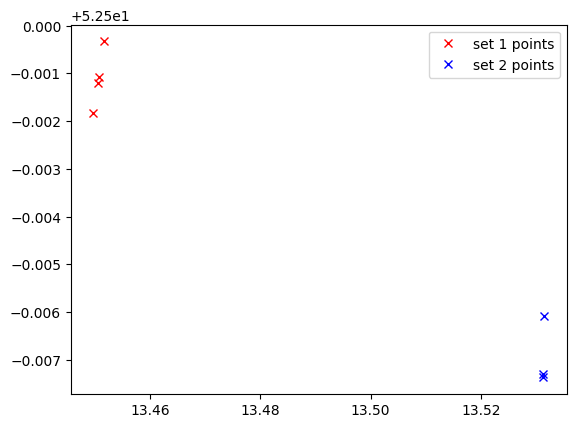

In [12]:
import matplotlib.pyplot as plt # show results
plt.plot(lines[0][:, 0], lines[0][:, 1], 'rx', label='set 1 points')
plt.plot(lines[1][:, 0], lines[1][:, 1], 'bx', label='set 2 points')
plt.legend()
plt.show()
